<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/reviews_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/reviews_sentiment.csv"
df = pd.read_csv(filename, sep=";")

1.Analisis y Depuracion de Datos

In [10]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [13]:
#En funcion de la revision general de la columna "titleSentiment" decidimos reemplazar las celdas vacias por el atributo "positive", debido a que a nuestra interpretacion, la mayoria de los comentarios hacian relacion con dicha calificacion.
df2=df
df2["titleSentiment"].fillna("positive", inplace=True)
df2.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  257 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [14]:
df2.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [15]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("rev_sentiment.xlsx", index=False)

In [16]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.

import pandas as pd

corr_df = df2.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,wordcount,Star Rating,sentimentValue
wordcount,1.000000,-0.402059,-0.347232
Star Rating,-0.402059,1.000000,0.792180
sentimentValue,-0.347232,0.792180,1.000000


2. Creacion y Optimizacion de Modelo Predictivo

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [19]:
X = df2[['wordcount','sentimentValue']].values
y = df2['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [45]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.85


Resultados obtenidos

In [46]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  1 20]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       0.89      0.80      0.84        10
           5       0.95      0.80      0.87        25

    accuracy                           0.85        65
   macro avg       0.81      0.88      0.82        65
weighted avg       0.87      0.85      0.85        65



Gráfica de la Clasificación Obtenida

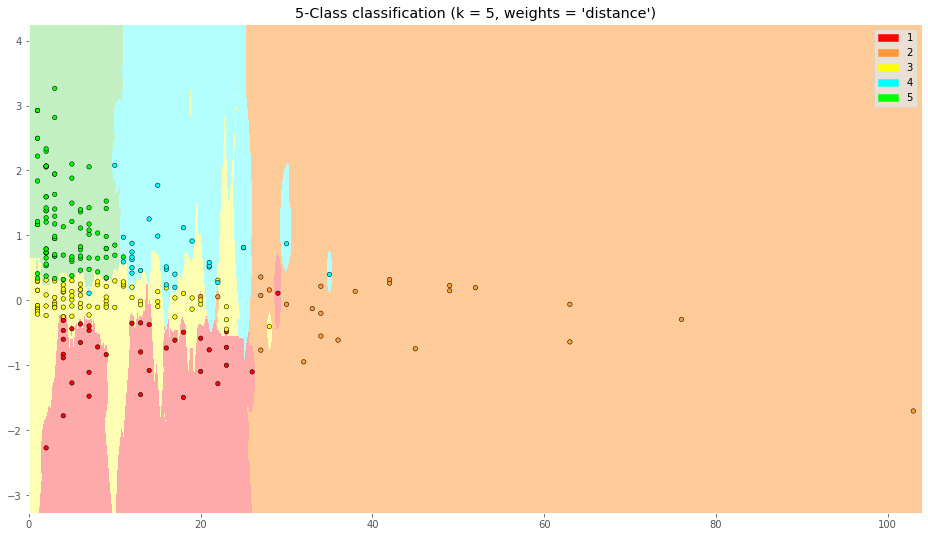

In [47]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

Cómo obtener el mejor valor de k

([<matplotlib.axis.XTick at 0x7fc52b2ffbd0>,
 <a list of 5 Text major ticklabel objects>)

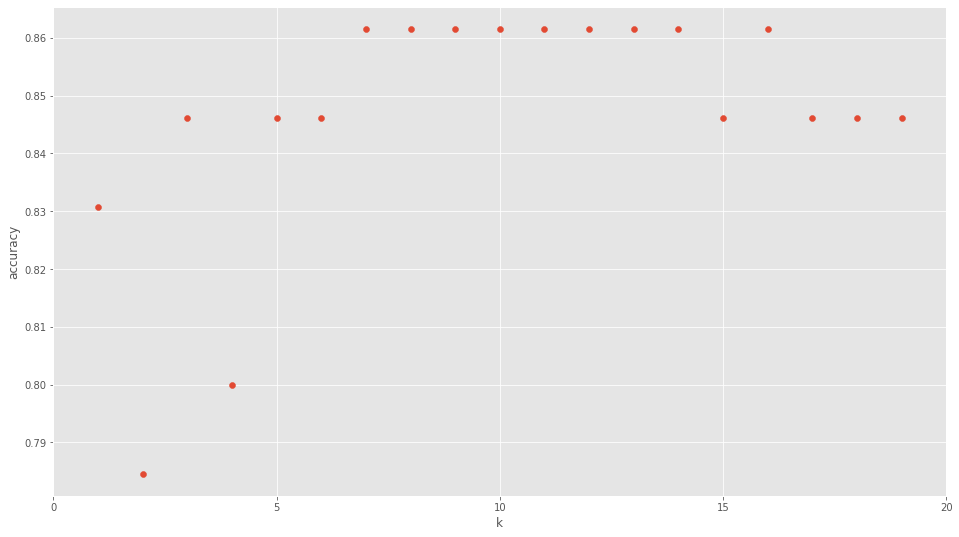

In [48]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Predicciones